In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

# Folder path containing the XLSX files
folder_path = '/Users/kalyan/Library/CloudStorage/OneDrive-IIMVIZAG/Python-Exercise-KK/Kalyan-Jupyter-Notebooks/Capex/raw_data/'

filename_1 = "Completed_Cost_2014-2022.xlsx"
file_path_1 = os.path.join(folder_path, filename_1)
#reading the excel file
# df=  pd.read_excel(r"C:\Users\hp\Documents\Intern_IIMV\Completed_Cost_2014-2022.xlsx")

df = pd.read_excel(file_path_1)

df.columns =['state', 'Completed 14-15', 'Completed 15-16', 'Completed 16-17','Completed 17-18','Completed 18-19','Completed 19-20','Completed 20-21','Completed 21-22','Completed 22-23']
drop = [36, 37, 38]
valid_rows = [idx for idx in drop if idx < len(df)]
df = df.drop(df.index[valid_rows])
df

,state,Completed 14-15,Completed 15-16,Completed 16-17,Completed 17-18,Completed 18-19,Completed 19-20,Completed 20-21,Completed 21-22,Completed 22-23
0,Andhra Pradesh,265635.5,565132.0,402773.9,391792.5,150077.2,332408.7,131884.9,393340.2,259344.9
1,Arunachal Pradesh,NaN,2688.3,3537.8,84.0,42107.3,11340.4,88602.0,27325.0,18328.1
2,Assam,4805.2,116551.5,101108.1,47199.6,153351.6,74478.3,33986.6,45082.9,19990.3
3,Bihar,103575.6,172357.1,38946.6,94343.3,80094.6,55745.8,253933.7,154922.2,225774.2
4,Chhattisgarh,112109.0,375903.2,82949.4,128251.6,405635.3,172207.0,11347.5,26499.3,33157.3
5,NCT of Delhi,18654.2,41043.7,60010.3,298126.1,199601.6,15509.5,11786.9,59283.9,80498.3
6,Goa,4977.4,2377.0,6271.8,2030.0,4346.6,11223.3,18969.3,14031.9,36935.9
7,Gujarat,297255.6,325846.5,761520.8,417643.1,717123.1,479262.4,196021.3,312138.6,661485.7
8,Haryana,228617.6,33420.9,166225.3,135914.3,355501.0,205119.4,56631.3,826206.7,249034.8
9,Himachal Pradesh,79618.5,77892.7,14942.2,24842.3,9657.8,17081.0,26375.9,68318.3,42870.6


In [2]:
df['Completed 16-17'] = df['Completed 16-17'].fillna(df['Completed 16-17'].dropna().mean())
df['Completed 19-20'] = df['Completed 19-20'].fillna(df['Completed 19-20'].dropna().mean())
df['Completed 14-15'] = df['Completed 14-15'].fillna(df['Completed 14-15'].dropna().mean())
df['Completed 18-19'] = df['Completed 18-19'].fillna(df['Completed 18-19'].dropna().mean())
df['Completed 20-21'] = df['Completed 20-21'].fillna(df['Completed 20-21'].dropna().mean())
df['Completed 21-22'] = df['Completed 21-22'].fillna(df['Completed 21-22'].dropna().mean())
df['Completed 22-23'] = df['Completed 22-23'].fillna(df['Completed 22-23'].dropna().mean())
df['Completed 17-18'] = df['Completed 17-18'].fillna(df['Completed 17-18'].dropna().mean())
df['Completed 15-16'] = df['Completed 15-16'].fillna(df['Completed 15-16'].dropna().mean())
df.isnull().sum().sort_values(ascending = False)

state              0
Completed 14-15    0
Completed 15-16    0
Completed 16-17    0
Completed 17-18    0
Completed 18-19    0
Completed 19-20    0
Completed 20-21    0
Completed 21-22    0
Completed 22-23    0
dtype: int64

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
km = KMeans(n_clusters=3)
x  = df.drop("state", axis='columns')
y_predict = km.fit_predict(x)
y_predict


array([0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [4]:
df['cluster'] = y_predict
df.head()

,state,Completed 14-15,Completed 15-16,Completed 16-17,Completed 17-18,Completed 18-19,Completed 19-20,Completed 20-21,Completed 21-22,Completed 22-23,cluster
0,Andhra Pradesh,265635.5,565132.0,402773.9,391792.5,150077.2,332408.7,131884.9,393340.2,259344.9,0
1,Arunachal Pradesh,114519.8,2688.3,3537.8,84.0,42107.3,11340.4,88602.0,27325.0,18328.1,1
2,Assam,4805.2,116551.5,101108.1,47199.6,153351.6,74478.3,33986.6,45082.9,19990.3,1
3,Bihar,103575.6,172357.1,38946.6,94343.3,80094.6,55745.8,253933.7,154922.2,225774.2,1
4,Chhattisgarh,112109.0,375903.2,82949.4,128251.6,405635.3,172207.0,11347.5,26499.3,33157.3,1


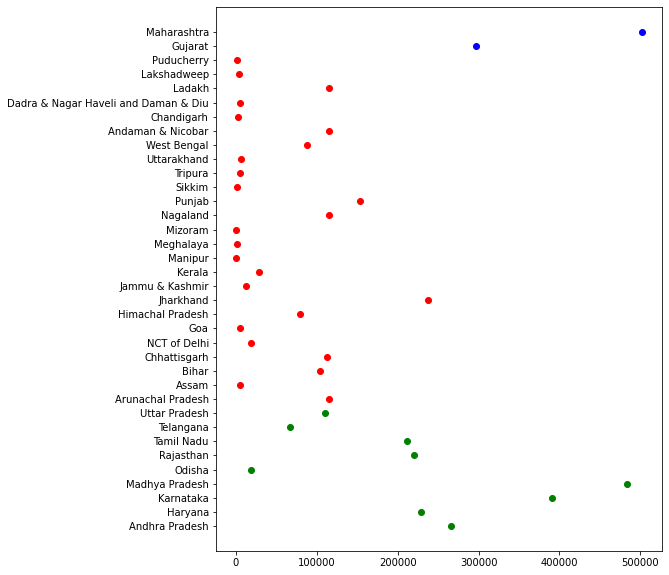

In [5]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
#df4 = df[df.cluster == 3]
#df5 = df[df.cluster == 4]
plt.figure(figsize=(8,10))
plt.scatter(df1['Completed 14-15'],df1['state'], color ='green')
plt.scatter(df2['Completed 14-15'],df2['state'], color ='red')
plt.scatter(df3['Completed 14-15'],df3['state'], color ='blue')


In [7]:
scaler = MinMaxScaler()
scaler.fit(df[['Completed 14-15', 'Completed 15-16', 'Completed 16-17','Completed 17-18','Completed 18-19','Completed 19-20','Completed 20-21','Completed 21-22','Completed 22-23']])
df[['Completed 14-15', 'Completed 15-16', 'Completed 16-17','Completed 17-18','Completed 18-19','Completed 19-20','Completed 20-21','Completed 21-22','Completed 22-23']] = scaler.transform(df[['Completed 14-15', 'Completed 15-16', 'Completed 16-17','Completed 17-18','Completed 18-19','Completed 19-20','Completed 20-21','Completed 21-22','Completed 22-23']])
df

,state,Completed 14-15,Completed 15-16,Completed 16-17,Completed 17-18,Completed 18-19,Completed 19-20,Completed 20-21,Completed 21-22,Completed 22-23,cluster
0,Andhra Pradesh,0.529037,1.000000,0.528501,0.565875,0.208946,0.513626,0.301854,0.410825,0.193699,0
1,Arunachal Pradesh,0.227867,0.004736,0.003786,0.000000,0.058323,0.017245,0.202437,0.028436,0.013633,1
2,Assam,0.009208,0.206221,0.132023,0.068065,0.213514,0.114858,0.076991,0.046988,0.014875,1
3,Bihar,0.206055,0.304971,0.050324,0.136170,0.111317,0.085897,0.582189,0.161741,0.168618,1
4,Chhattisgarh,0.223062,0.665153,0.108157,0.185155,0.565461,0.265950,0.024991,0.027573,0.024712,1
5,NCT of Delhi,0.036809,0.072607,0.078008,0.430561,0.278035,0.023691,0.026000,0.061824,0.060081,1
6,Goa,0.009551,0.004185,0.007380,0.002811,0.005645,0.017064,0.042497,0.014548,0.027535,1
7,Gujarat,0.592055,0.576576,1.000000,0.603219,1.000000,0.740666,0.449170,0.325991,0.494142,2
8,Haryana,0.455261,0.059118,0.217606,0.196225,0.495521,0.316833,0.129004,0.863057,0.185996,0
9,Himachal Pradesh,0.158309,0.137813,0.018775,0.035767,0.013055,0.026120,0.059510,0.071263,0.031969,1


In [8]:
x  = df.drop("state", axis='columns')
x = x.drop("cluster", axis='columns')
y_predict = km.fit_predict(x)
y_predict

array([2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0,
       0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
df['cluster'] = y_predict
df.head()

,state,Completed 14-15,Completed 15-16,Completed 16-17,Completed 17-18,Completed 18-19,Completed 19-20,Completed 20-21,Completed 21-22,Completed 22-23,cluster
0,Andhra Pradesh,0.529037,1.000000,0.528501,0.565875,0.208946,0.513626,0.301854,0.410825,0.193699,2
1,Arunachal Pradesh,0.227867,0.004736,0.003786,0.000000,0.058323,0.017245,0.202437,0.028436,0.013633,1
2,Assam,0.009208,0.206221,0.132023,0.068065,0.213514,0.114858,0.076991,0.046988,0.014875,1
3,Bihar,0.206055,0.304971,0.050324,0.136170,0.111317,0.085897,0.582189,0.161741,0.168618,0
4,Chhattisgarh,0.223062,0.665153,0.108157,0.185155,0.565461,0.265950,0.024991,0.027573,0.024712,0


In [10]:
k_rng = range(1,10)
ssl = []
for k in k_rng:
    km = KMeans(n_clusters =k)
    km.fit(x)
    ssl.append(km.inertia_)

In [11]:
ssl

[19.431643906761902,
 9.172879586108406,
 7.386468653278348,
 6.353141838244568,
 5.456475743508353,
 4.761166554188144,
 4.046179346715343,
 3.660377611443257,
 3.2286308500804086]

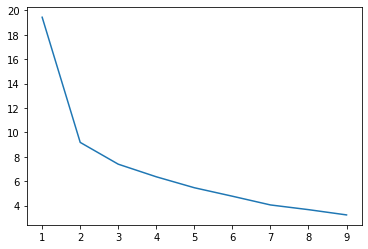

In [12]:
plt.plot(k_rng,ssl)


In [14]:
y = df[['state', 'cluster']]
y=y.sort_values('cluster')
y

,state,cluster
8,Haryana,0
21,Punjab,0
14,Madhya Pradesh,0
3,Bihar,0
4,Chhattisgarh,0
22,Rajasthan,0
29,West Bengal,0
20,Odisha,0
25,Telangana,0
23,Sikkim,1
